In [71]:
import os
import pandas as pd
from matplotlib.image import imread
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage.transform import resize

In [72]:
import numpy as np
import pandas as pd
import random as ran
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from keras import  models, layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

In [73]:
image_dir = os.path.dirname(os.getcwd())+"\\Screenshots\\InSemiContext\\"
filenames = os.listdir(image_dir)
labels = [x.split("_")[0] for x in filenames]
img = [imread(image_dir + x) for x in filenames]

data = pd.DataFrame({"filename": filenames, "label": labels, "img": img})

for index, row in data.iterrows():
    img = imread(image_dir + row["filename"])
    img = resize(img, (80,80))
    data.loc[index, "img"] = img

data = data.reset_index()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     1440 non-null   int64 
 1   filename  1440 non-null   object
 2   label     1440 non-null   object
 3   img       1440 non-null   object
dtypes: int64(1), object(3)
memory usage: 45.1+ KB


In [74]:
#Splitting the data into training and testing
train_df, test_df = train_test_split(data, test_size=0.3, stratify=data['label'])

# Datagen for training data. Augment the data by rotating, shifting, flipping, to make the model more robust and less prone to overfitting
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_dataframe(dataframe = train_df,
    directory=image_dir,
    target_size=(64, 64),
    x_col='filename',
    y_col='label',
    batch_size=64,
    class_mode='categorical'  # or 'categorical' based on your problem
)

Found 1008 validated image filenames belonging to 5 classes.


In [76]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(64, 64),
    batch_size=64,
    class_mode= "categorical",  # or 'categorical',
    shuffle=False
)

Found 432 validated image filenames belonging to 5 classes.


In [77]:
def plot_model_loss(model):
    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()

def plot_model_acc(model):
    plt.plot(model.history['accuracy'])
    plt.plot(model.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='lower right')
    plt.show()

In [28]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 3)),  # Adjust input_shape based on your image dimensions
    MaxPooling2D(2, 2),
    Dropout(0.2),
    Conv2D(32, (3,3), activation='relu'),  # Adjust input_shape based on your image dimensions
    MaxPooling2D(2, 2),
    Dropout(0.2),
    # Add more layers as needed
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')  # or more units with 'softmax' for multi-class classification
])

model.compile(optimizer=Adam(learning_rate=0.0002), loss='categorical_crossentropy', metrics=['accuracy'])
trained_model_reduce_epochs = model.fit(train_generator,validation_data = test_generator, epochs=60)

C:\Users\Søren Merved\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60


C:\Users\Søren Merved\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.2313 - loss: 1.6582 - val_accuracy: 0.4653 - val_loss: 1.5024
Epoch 2/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.3503 - loss: 1.4789 - val_accuracy: 0.5139 - val_loss: 1.3063
Epoch 3/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.4414 - loss: 1.3098 - val_accuracy: 0.6597 - val_loss: 1.0342
Epoch 4/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.5636 - loss: 1.1282 - val_accuracy: 0.7708 - val_loss: 0.8157
Epoch 5/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.6382 - loss: 0.9643 - val_accuracy: 0.7176 - val_loss: 0.7086
Epoch 6/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.6958 - loss: 0.8311 - val_accuracy: 0.8449 - val_loss: 0.5766
Epoch 7/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.7522 - loss: 0.7045 - val_accuracy: 0.9074 - val_loss: 0.4770
Epoch 8/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.7920 - loss: 0.6285 - val_accuracy: 0.9005 - val_loss: 0

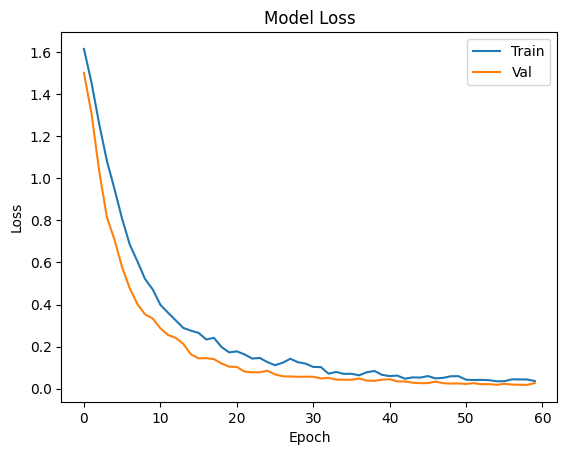

In [31]:
plot_model_loss(trained_model_reduce_epochs)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
[[22 15 24 11 17]
 [29 11 17 16 19]
 [11 24 16 17 19]
 [10 15 14 15 17]
 [19 27 14 12 21]]


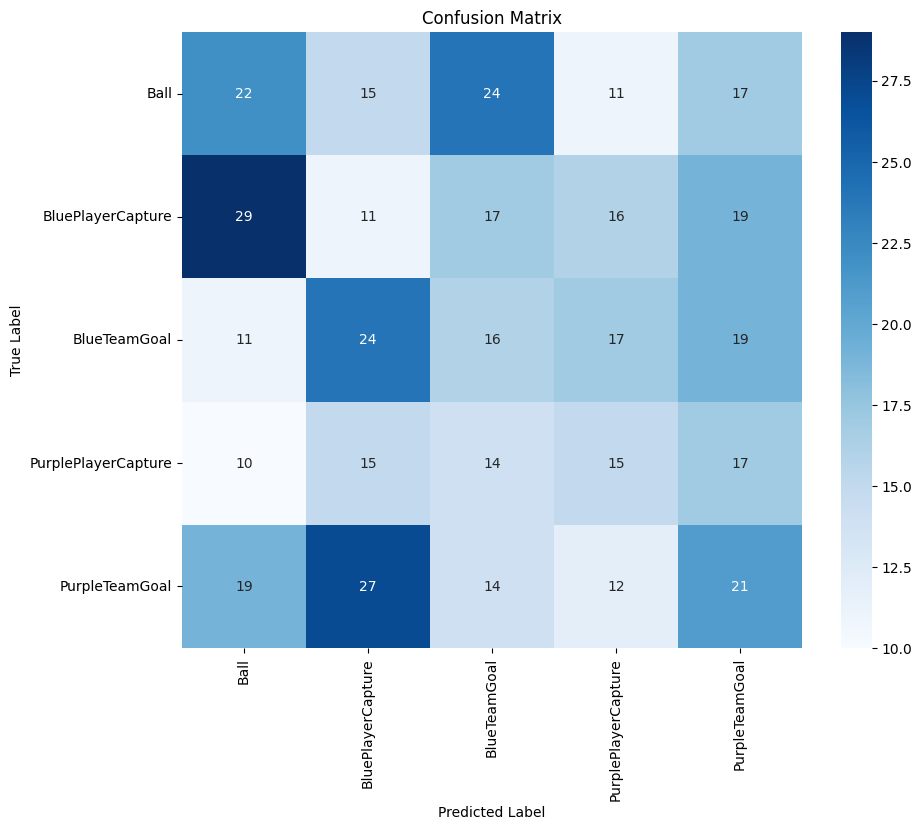

In [38]:
from sklearn.metrics import confusion_matrix
test_labels = test_generator.classes

# Predict the probabilities on the test data
predictions = model.predict(test_generator)

# Convert predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predicted_classes)

print(cm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



In [78]:
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0002), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

trained_model = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=60,
    callbacks=[early_stopping]
)

C:\Users\Søren Merved\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60


C:\Users\Søren Merved\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.1903 - loss: 1.6883 - val_accuracy: 0.2870 - val_loss: 1.6002
Epoch 2/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.2352 - loss: 1.6003 - val_accuracy: 0.2500 - val_loss: 1.5893
Epoch 3/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.2525 - loss: 1.5967 - val_accuracy: 0.4468 - val_loss: 1.5697
Epoch 4/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.3533 - loss: 1.5297 - val_accuracy: 0.5278 - val_loss: 1.5068
Epoch 5/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.4059 - loss: 1.4547 - val_accuracy: 0.3981 - val_loss: 1.3979
Epoch 6/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.4316 - loss: 1.3297 - val_accuracy: 0.5208 - val_loss: 1.2332
Epoch 7/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.5262 - loss: 1.1599 - val_accuracy: 0.7245 - val_loss: 1.0098
Epoch 8/60
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.5697 - loss: 1.0175 - val_accuracy: 0.8333 - val_

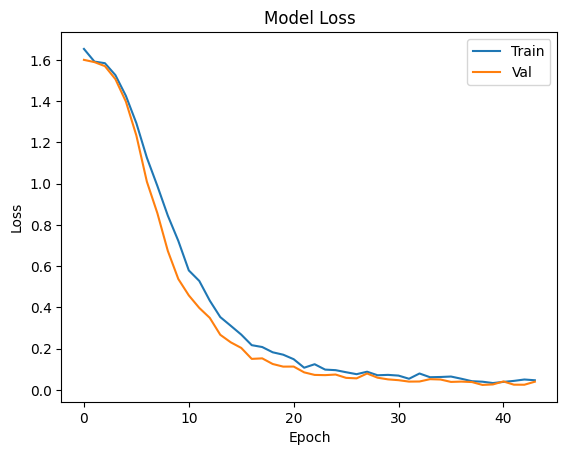

In [79]:
plot_model_loss(trained_model)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
[[87  0  0  0  0]
 [ 0 86  0  0  0]
 [ 0  0 86  0  0]
 [ 0  0  0 87  0]
 [ 0  0  1  0 85]]


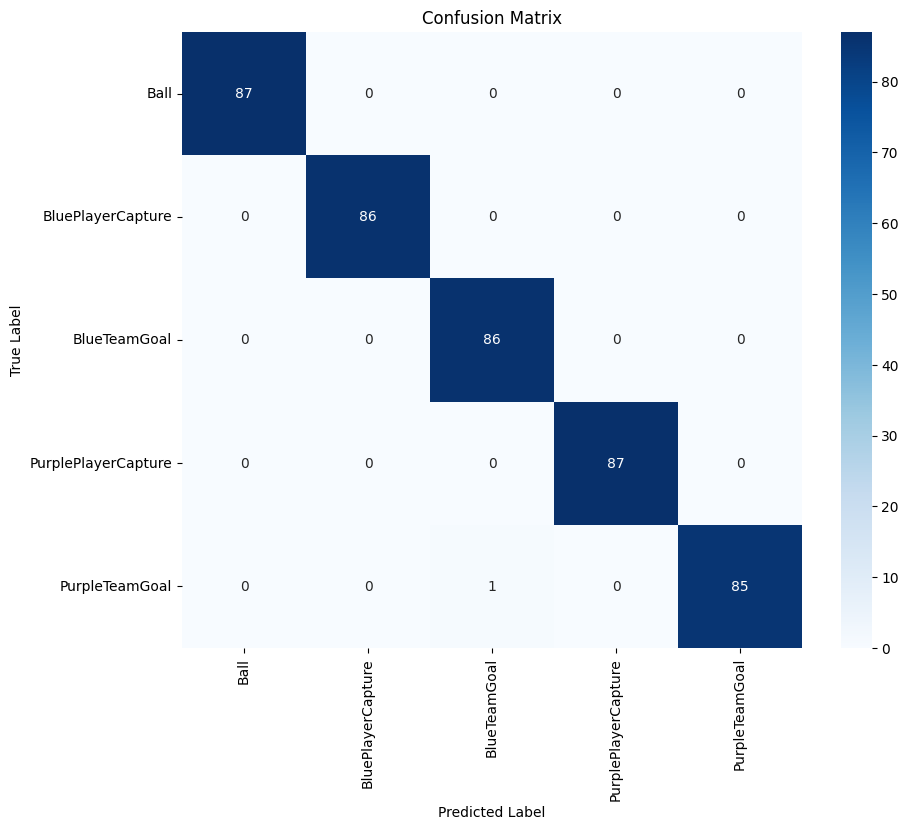

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


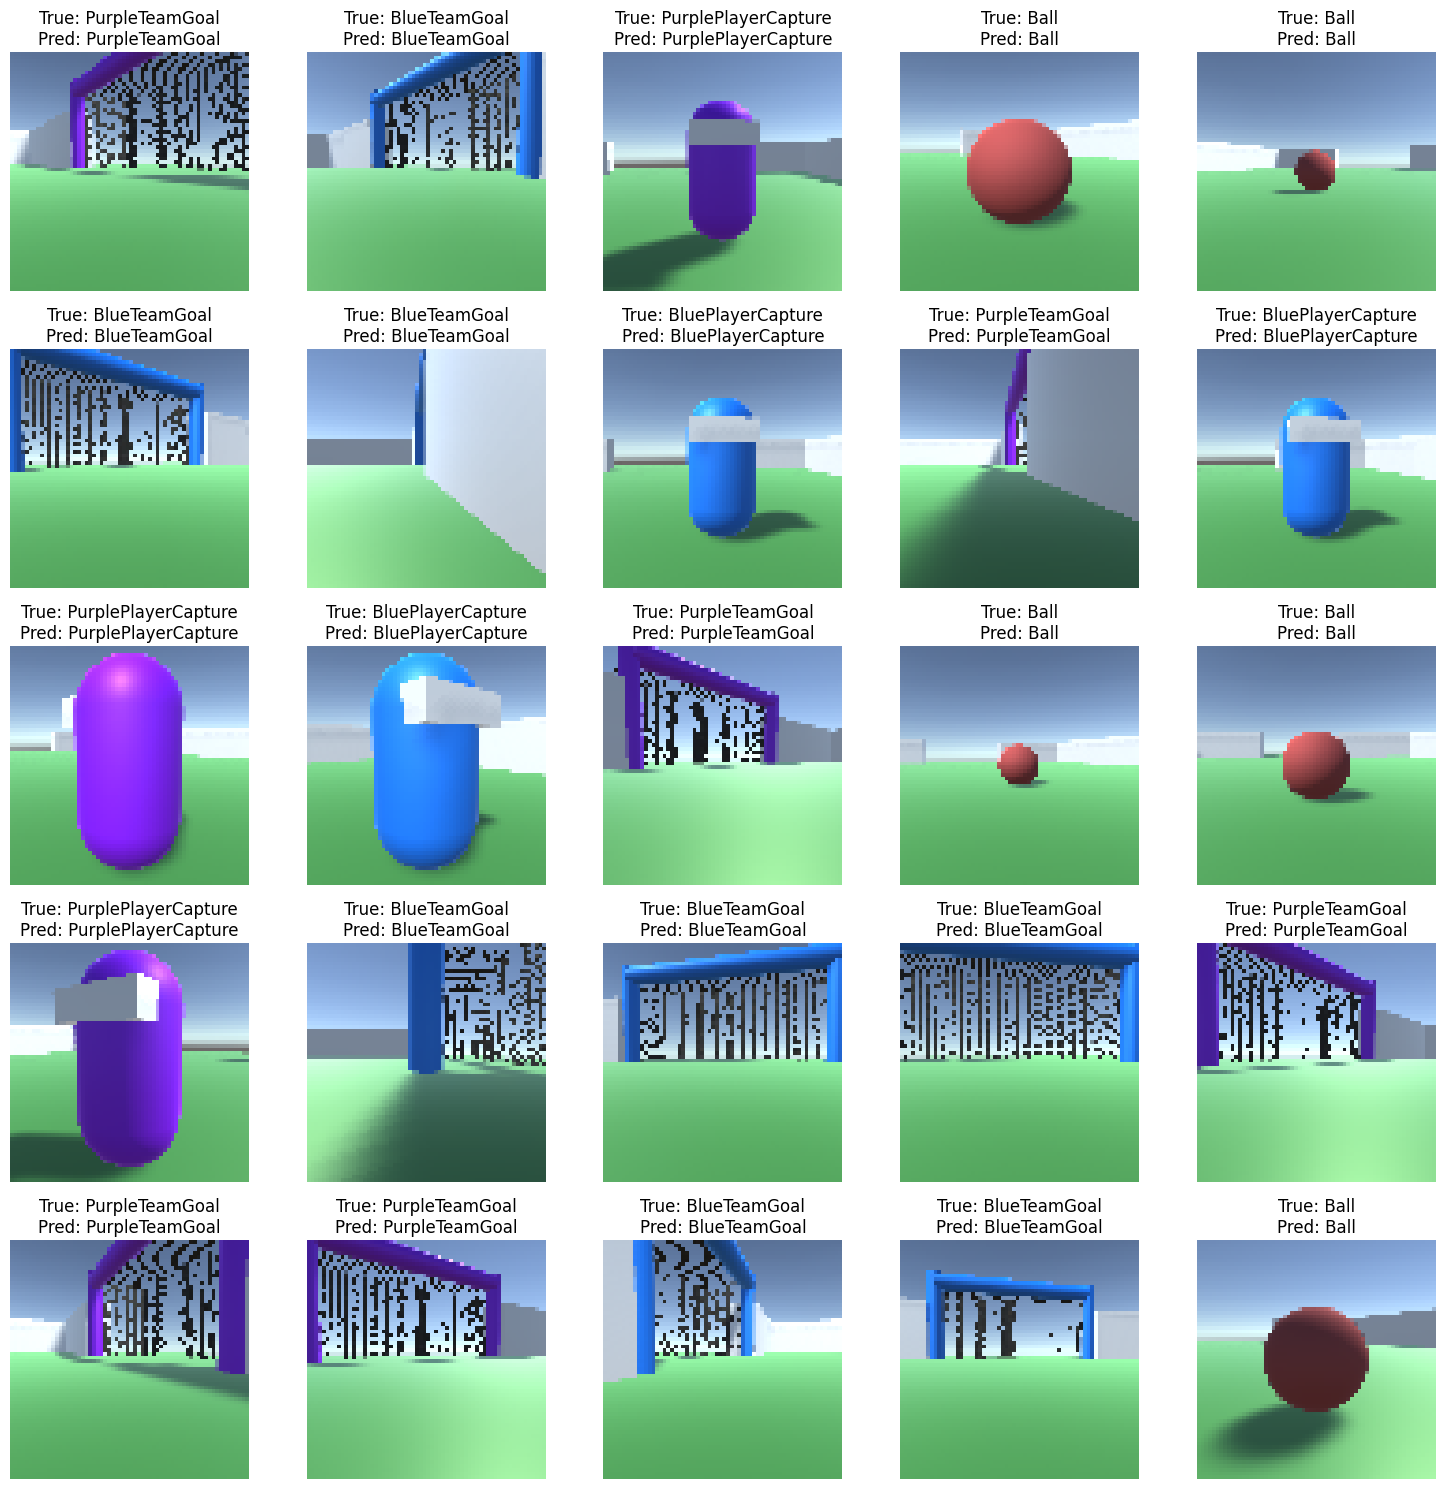

In [80]:
from sklearn.metrics import confusion_matrix

# Get the true labels
test_labels = test_generator.classes

# Predict the probabilities on the test data
predictions = model.predict(test_generator)

# Convert predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(test_labels, predicted_classes)

# Print the confusion matrix
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

def plot_images_with_predictions(generator, model, num_images=25):
    x, y = next(generator)
    y_true = np.argmax(y, axis=1)
    y_pred = np.argmax(model.predict(x), axis=1)
    
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.imshow(x[i])
        plt.title(f"True: {list(test_generator.class_indices.keys())[y_true[i]]}\nPred: {list(test_generator.class_indices.keys())[y_pred[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plotting a batch of images with their true and predicted labels
plot_images_with_predictions(test_generator, model)

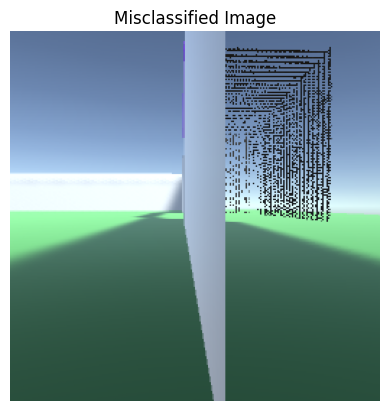

In [83]:
misclassified_index = np.where(test_labels != predicted_classes)[0][0]

# Retrieve the filename of the misclassified image
misclassified_filename = test_df.iloc[misclassified_index]['filename']

# Construct the full file path
misclassified_image_path = os.path.join(image_dir, misclassified_filename)

# Load and plot the misclassified image
misclassified_image = plt.imread(misclassified_image_path)
plt.imshow(misclassified_image)
plt.title("Misclassified Image")
plt.axis('off')
plt.show()

In [84]:
import tf2onnx
import tensorflow as tf

spec = (tf.TensorSpec((None, 64, 64, 3), tf.float32, name="input"),)
output_path = "semi_context" + ".onnx"
output_names = ['output']
model_proto, _ = tf2onnx.convert.from_keras(model, input_signature=spec,  output_path=output_path)

AttributeError: 'Sequential' object has no attribute 'output_names'